Importing Libraries

# Quantitative Analysis with pynance and TaLib

Importing Libraries

In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import yfinance as yf
import quantstats as qs 
import pynance as py   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
def analyze_stock(csv_path, ticker_name):
    # ==========================
    # LOAD DATA
    # ==========================
    df = pd.read_csv(csv_path, parse_dates=['Date'])
    df.set_index('Date', inplace=True)

    # If MultiIndex → flatten
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    df["Ticker"] = ticker_name
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    print(f"\n===== {ticker_name} Summary =====")
    print(df.describe().T)

    # ==========================
    # PRICE CHART
    # ==========================
    df["Close"].plot(title=f"{ticker_name} Close Price")
    plt.ylabel("Price ($)")
    plt.show()

    # ==========================
    # VOLUME CHART
    # ==========================
    df["Volume"].plot(title=f"{ticker_name} Daily Volume")
    plt.ylabel("Shares traded")
    plt.show()

    # ==========================
    # TECHNICAL INDICATORS (TA-Lib)
    # ==========================
    price = df["Adj Close"] if "Adj Close" in df.columns else df["Close"]

    df["SMA_20"] = talib.SMA(price, timeperiod=20)
    df["SMA_50"] = talib.SMA(price, timeperiod=50)
    df["EMA_20"] = talib.EMA(price, timeperiod=20)
    df["RSI_14"] = talib.RSI(price, timeperiod=14)
    df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(price)

    # ==========================
    # SMA Plot
    # ==========================
    plt.figure(figsize=(14,6))
    plt.plot(df.index, price, label="Price", color="black")
    plt.plot(df.index, df["SMA_20"], label="SMA 20")
    plt.plot(df.index, df["SMA_50"], label="SMA 50")
    plt.title(f"{ticker_name} – Price with Moving Averages")
    plt.legend()
    plt.show()

    # ==========================
    # RSI Plot
    # ==========================
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df["RSI_14"], label="RSI 14")
    plt.axhline(70, color="red", linestyle="--")
    plt.axhline(30, color="green", linestyle="--")
    plt.title(f"{ticker_name} – RSI(14)")
    plt.legend()
    plt.show()

    # ==========================
    # MACD Plot
    # ==========================
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df["MACD"], label="MACD")
    plt.plot(df.index, df["MACD_signal"], label="Signal")
    plt.bar(df.index, df["MACD_hist"])
    plt.title(f"{ticker_name} – MACD")
    plt.legend()
    plt.show()

    return df


===== AAPL Summary =====
         count          mean           std           min           25%  \
Close   3774.0  5.384117e+01  5.506404e+01  2.345299e+00  1.505036e+01   
High    3774.0  5.438380e+01  5.562723e+01  2.459265e+00  1.518304e+01   
Low     3774.0  5.324746e+01  5.444013e+01  2.345299e+00  1.490189e+01   
Open    3774.0  5.380163e+01  5.500918e+01  2.380989e+00  1.500758e+01   
Volume  3774.0  2.640640e+08  2.345629e+08  2.404830e+07  9.581845e+07   

                 50%           75%           max  
Close   2.697581e+01  7.466420e+01  1.962566e+02  
High    2.716884e+01  7.525238e+01  1.977525e+02  
Low     2.683684e+01  7.355355e+01  1.951569e+02  
Open    2.701021e+01  7.412793e+01  1.961674e+02  
Volume  1.667348e+08  3.777410e+08  1.880998e+09  


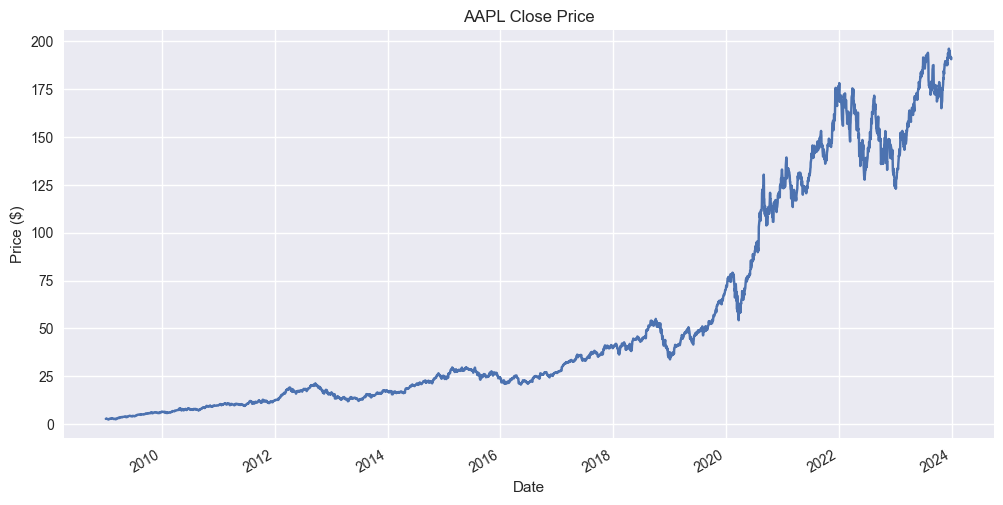

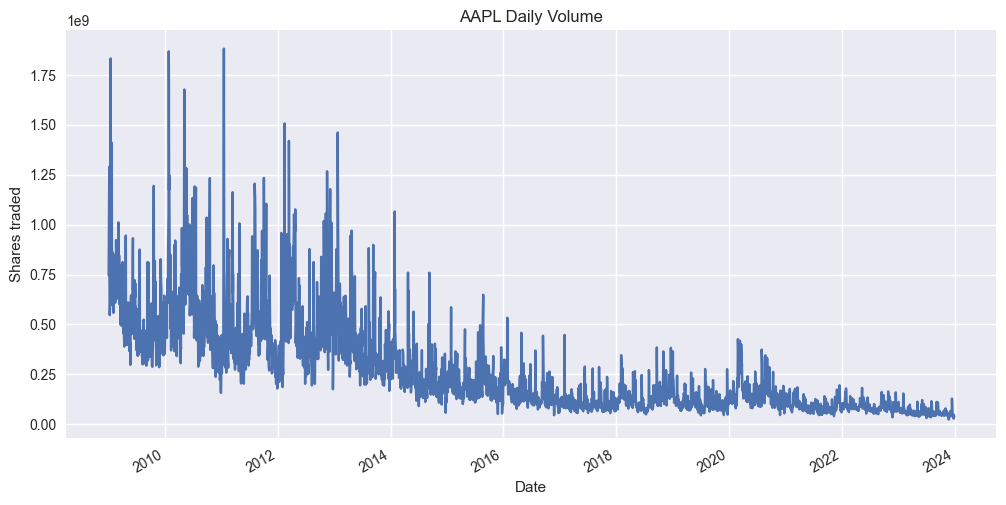

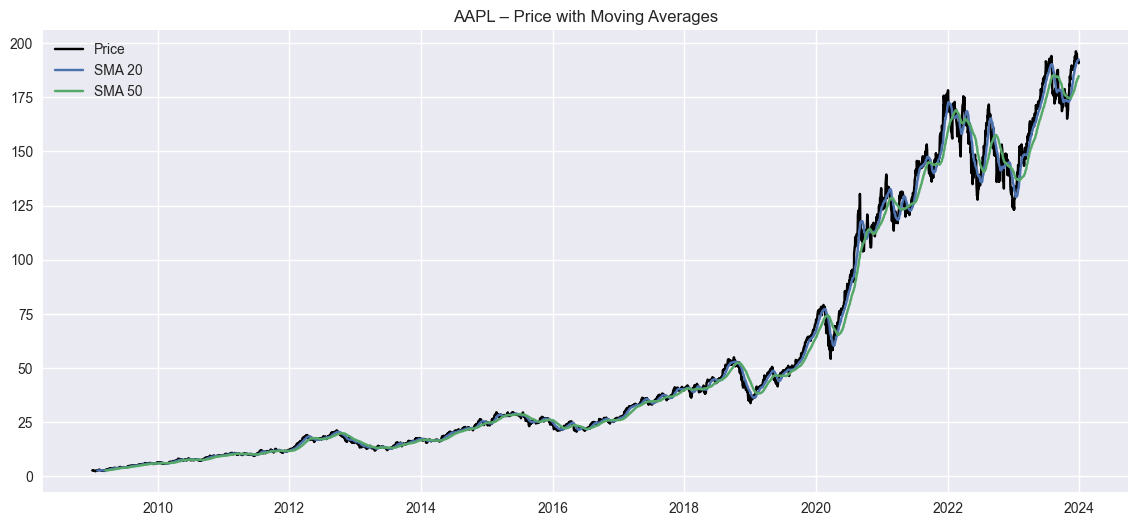

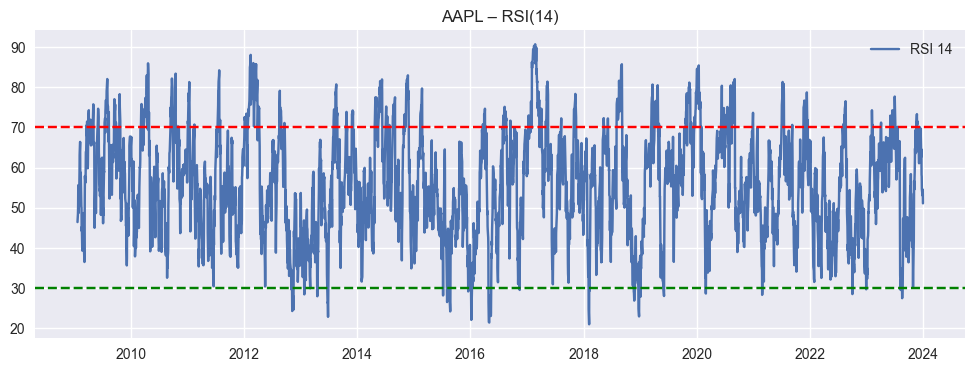

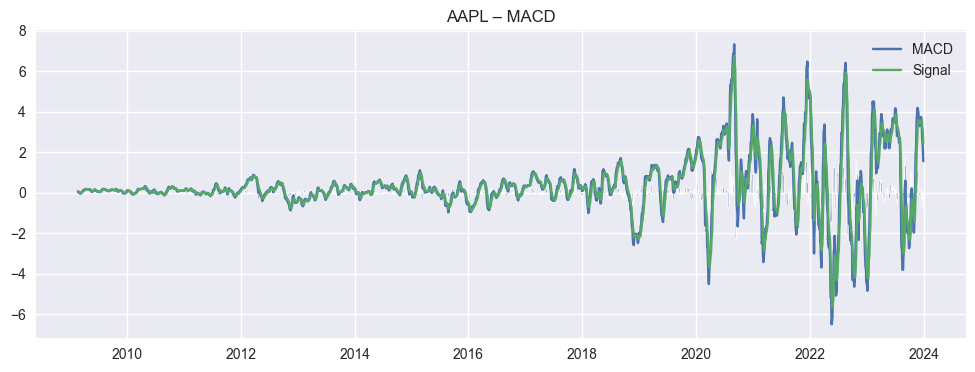


===== AMZN Summary =====
         count          mean           std           min           25%  \
Close   3774.0  5.940809e+01  5.491854e+01  2.422000e+00  1.219450e+01   
High    3774.0  6.011639e+01  5.561078e+01  2.505000e+00  1.230025e+01   
Low     3774.0  5.866949e+01  5.423398e+01  2.381500e+00  1.204212e+01   
Open    3774.0  5.942393e+01  5.495377e+01  2.428000e+00  1.214663e+01   
Volume  3774.0  9.185184e+07  6.057553e+07  1.762600e+07  5.586350e+07   

                 50%           75%           max  
Close   3.635950e+01  9.663825e+01  1.865705e+02  
High    3.648900e+01  9.775000e+01  1.886540e+02  
Low     3.600400e+01  9.537975e+01  1.848395e+02  
Open    3.632250e+01  9.666350e+01  1.872000e+02  
Volume  7.520600e+07  1.086060e+08  1.166116e+09  


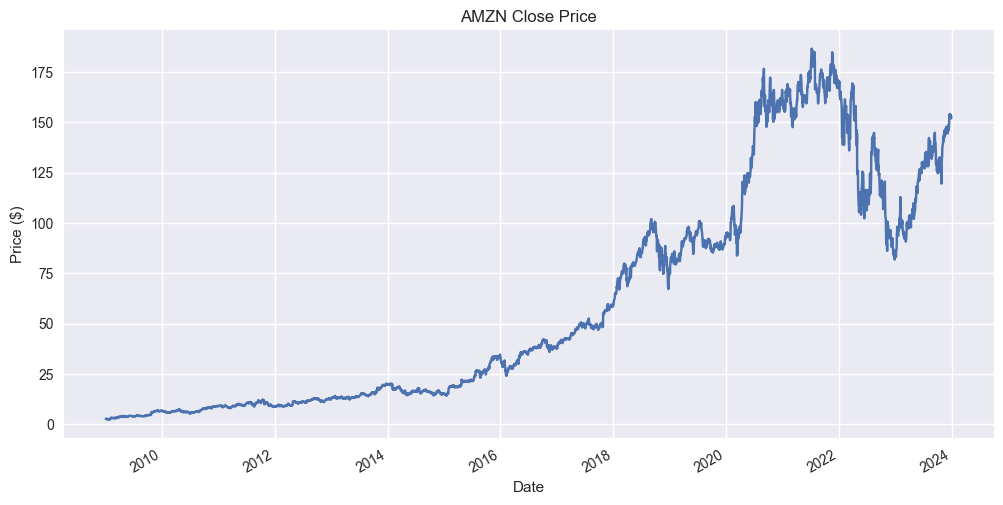

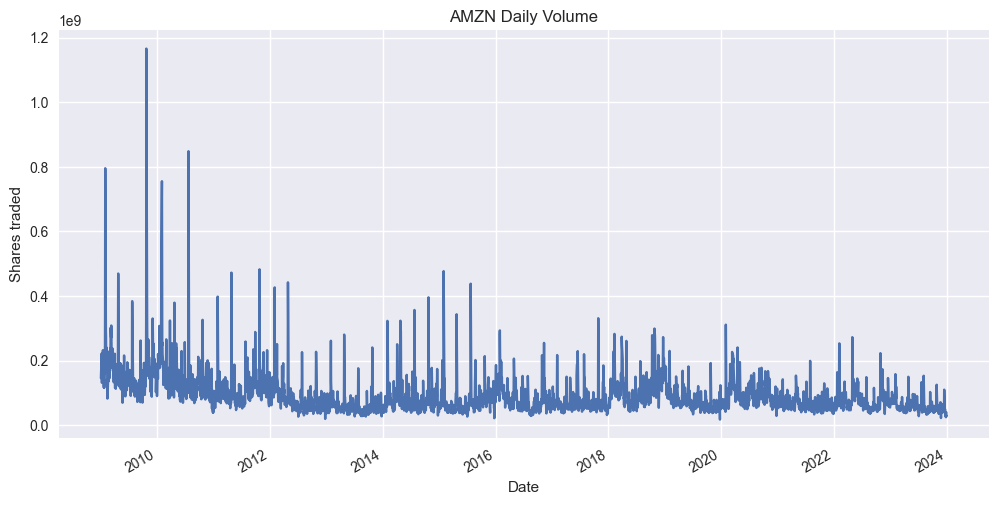

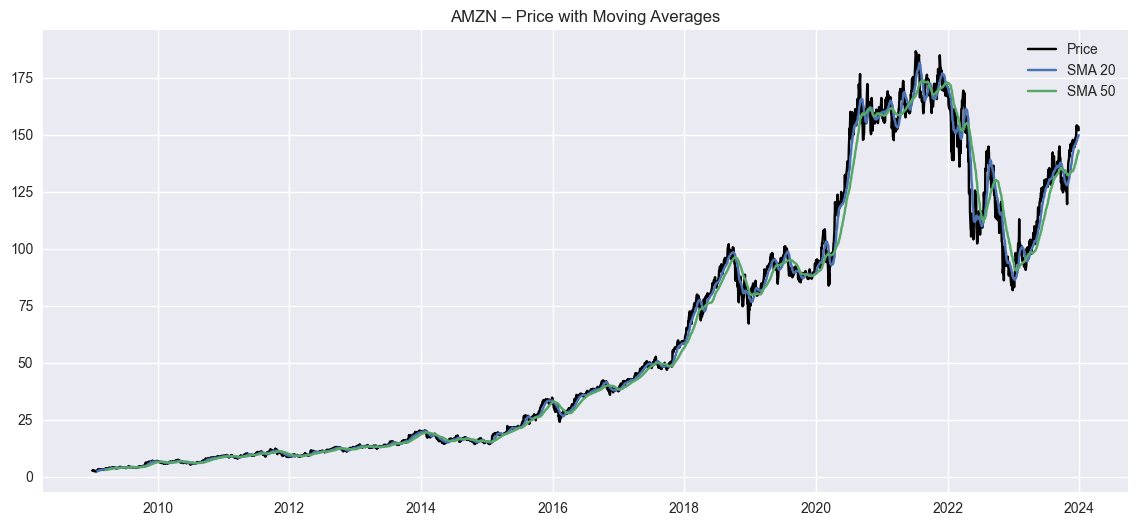

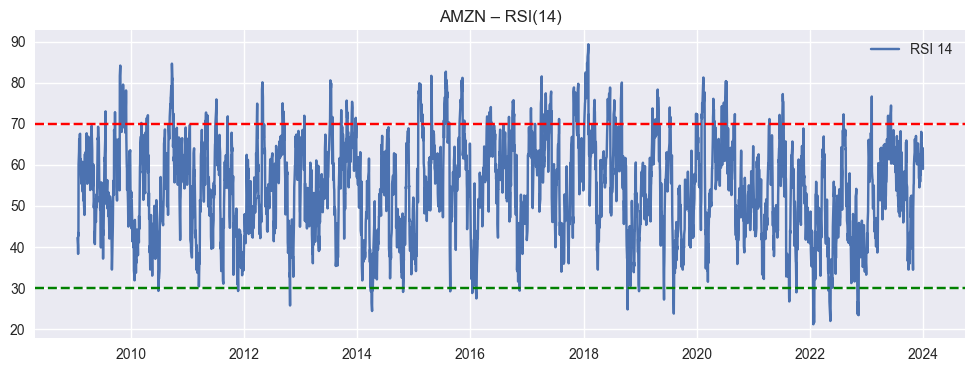

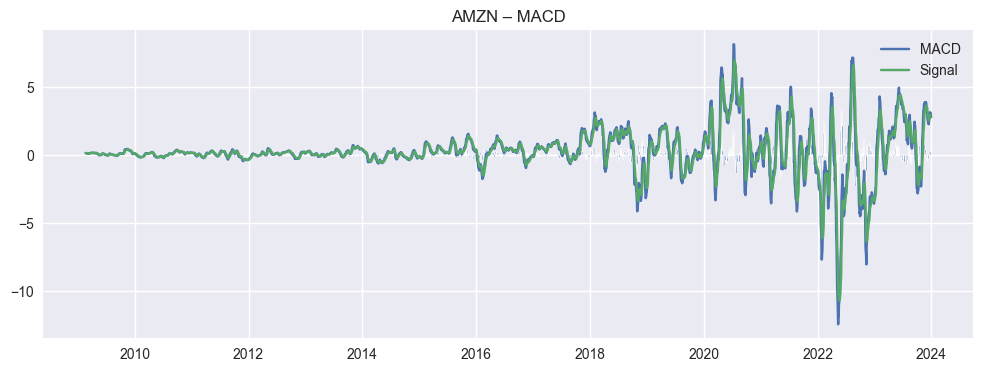


===== GOOG Summary =====
         count          mean           std            min           25%  \
Close   3774.0  5.077997e+01  3.941744e+01       6.994490  1.685109e+01   
High    3774.0  5.128516e+01  3.985330e+01       7.408840  1.698442e+01   
Low     3774.0  5.025235e+01  3.897505e+01       6.994490  1.669939e+01   
Open    3774.0  5.075353e+01  3.938974e+01       7.133018  1.682765e+01   
Volume  3774.0  6.123096e+07  5.537396e+07  158434.000000  2.574863e+07   

                 50%           75%           max  
Close   3.732780e+01  6.919150e+01  1.496847e+02  
High    3.764767e+01  7.008489e+01  1.510662e+02  
Low     3.703879e+01  6.836883e+01  1.488688e+02  
Open    3.738839e+01  6.906288e+01  1.508313e+02  
Volume  3.797798e+07  8.269781e+07  5.952147e+08  


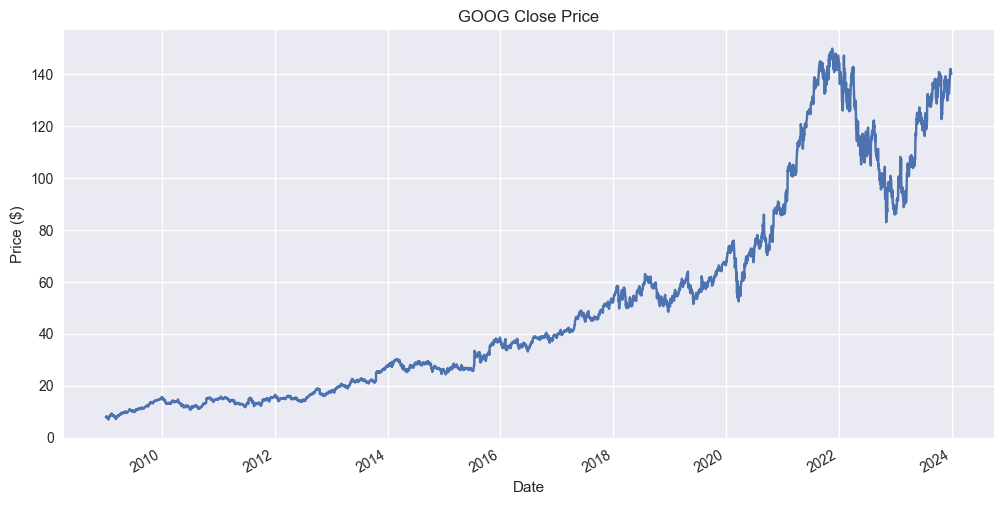

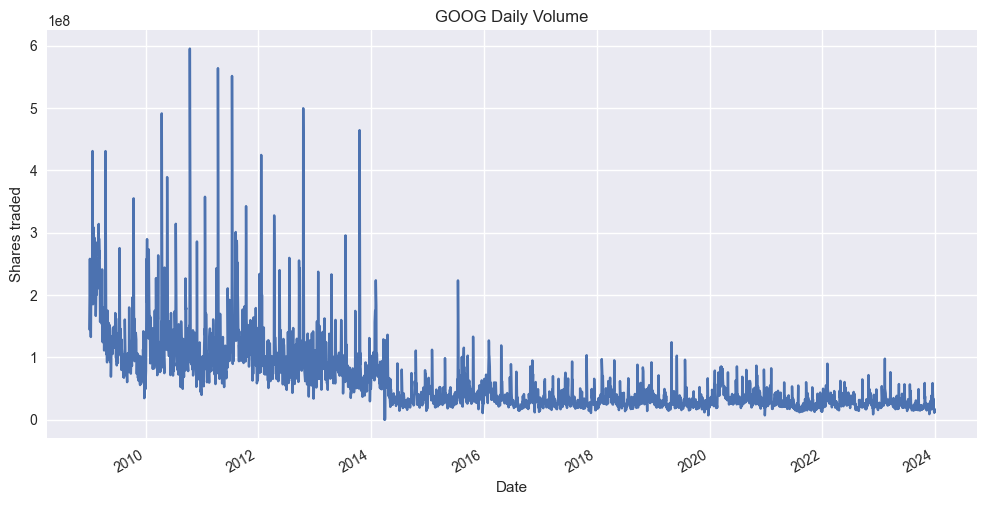

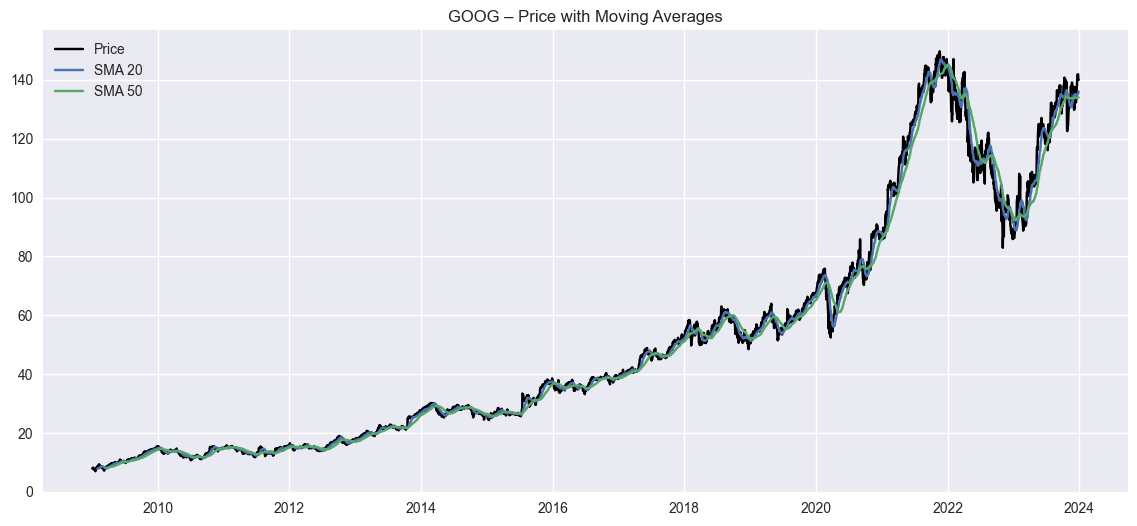

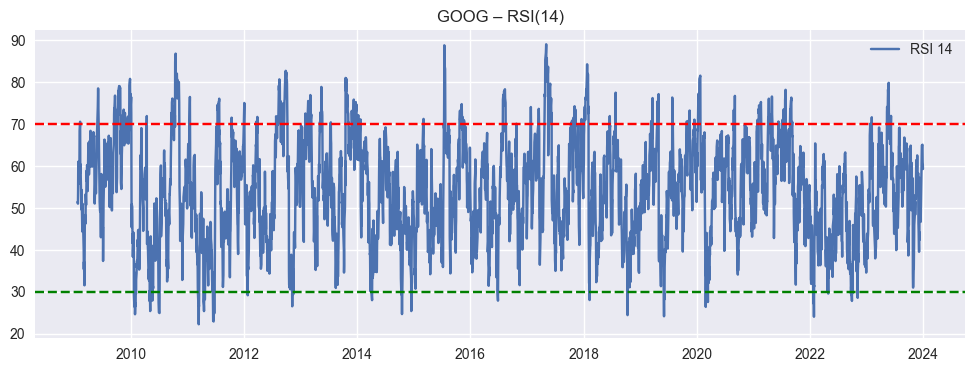

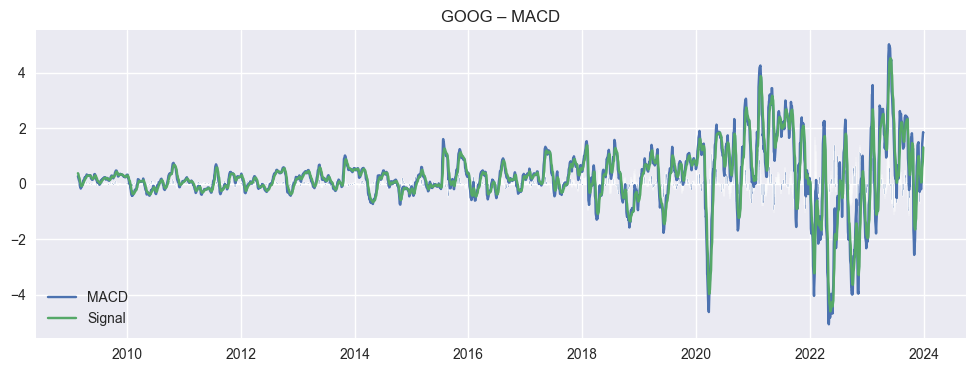


===== META Summary =====
         count          mean           std           min           25%  \
Close   2923.0  1.567274e+02  9.036877e+01  1.762137e+01  8.027512e+01   
High    2923.0  1.586905e+02  9.147074e+01  1.815806e+01  8.097084e+01   
Low     2923.0  1.546851e+02  8.922298e+01  1.744247e+01  7.966389e+01   
Open    2923.0  1.566536e+02  9.030883e+01  1.796922e+01  8.027513e+01   
Volume  2923.0  3.060615e+07  2.637157e+07  5.467500e+06  1.633730e+07   

                 50%           75%           max  
Close   1.525794e+02  2.035502e+02  3.798384e+02  
High    1.546367e+02  2.063728e+02  3.819752e+02  
Low     1.507308e+02  2.005487e+02  3.764890e+02  
Open    1.526987e+02  2.029638e+02  3.793414e+02  
Volume  2.295390e+07  3.522740e+07  5.735764e+08  


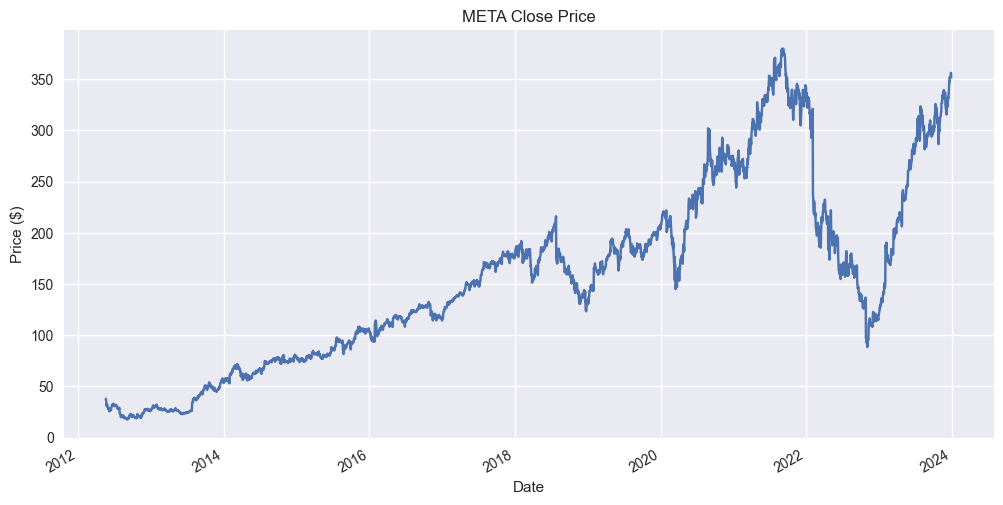

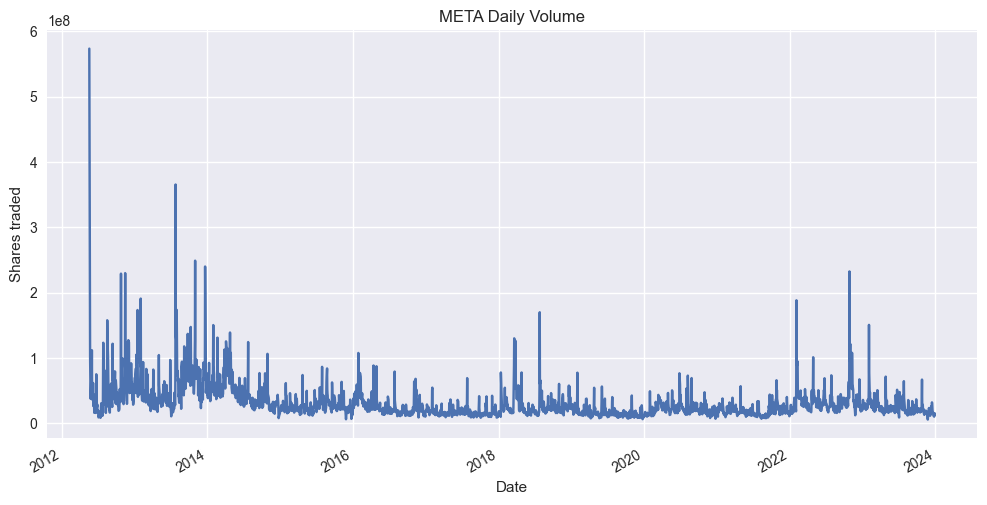

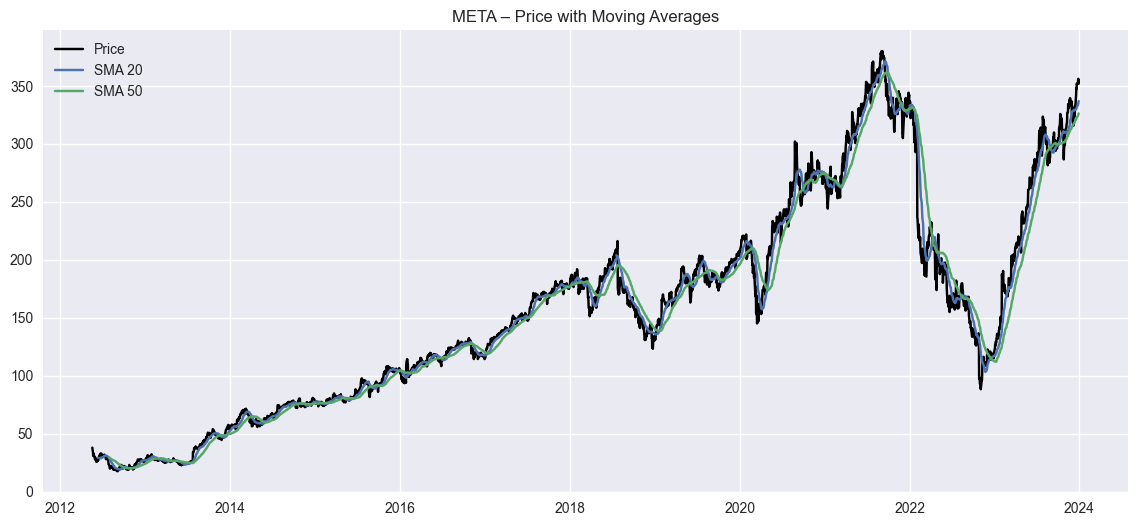

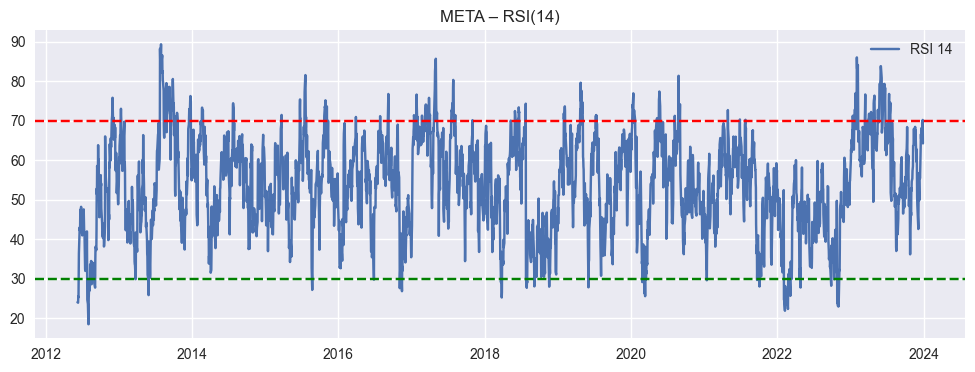

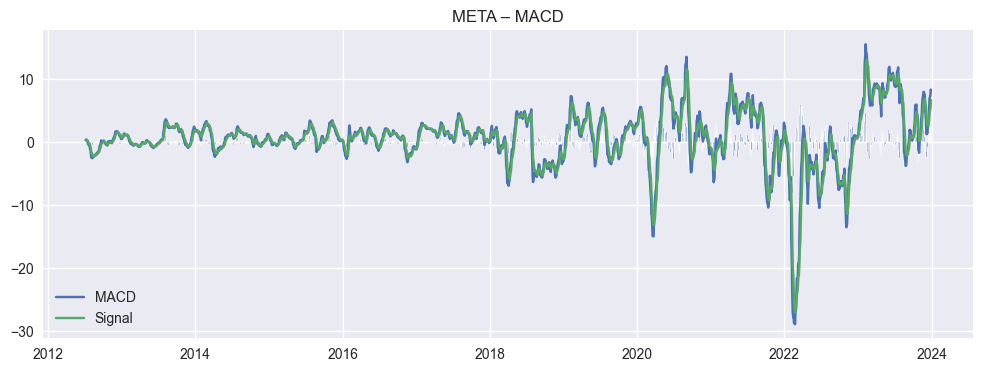


===== MSFT Summary =====
         count          mean           std           min           25%  \
Close   3774.0  1.024587e+02  1.005300e+02  1.115939e+01  2.372356e+01   
High    3774.0  1.034408e+02  1.015274e+02  1.150559e+01  2.391467e+01   
Low     3774.0  1.013744e+02  9.943128e+01  1.095315e+01  2.349813e+01   
Open    3774.0  1.024208e+02  1.004968e+02  1.119622e+01  2.372139e+01   
Volume  3774.0  3.895754e+07  2.245626e+07  7.425600e+06  2.398462e+07   

                 50%           75%           max  
Close   4.897156e+01  1.658316e+02  3.777836e+02  
High    4.919598e+01  1.669679e+02  3.793630e+02  
Low     4.860615e+01  1.629116e+02  3.733019e+02  
Open    4.889349e+01  1.660021e+02  3.788300e+02  
Volume  3.279110e+07  4.865400e+07  3.193179e+08  


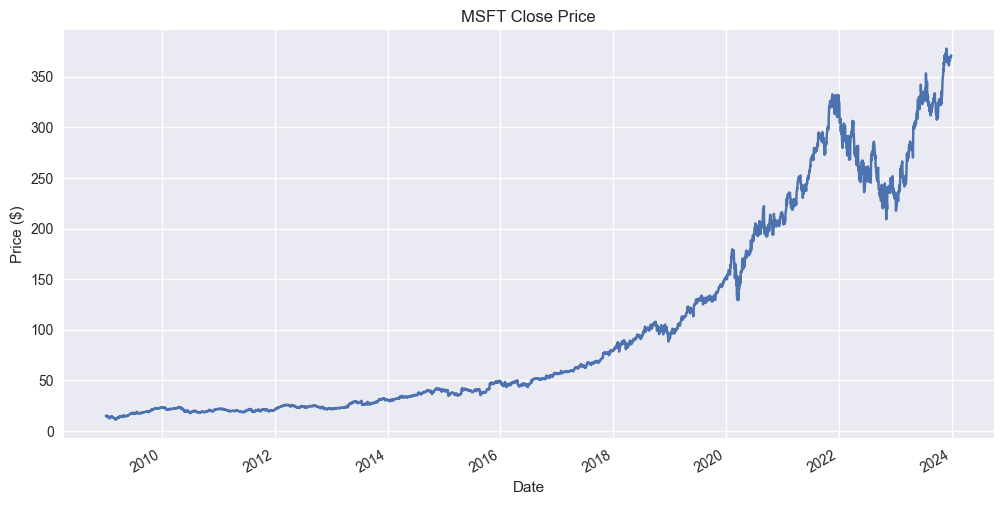

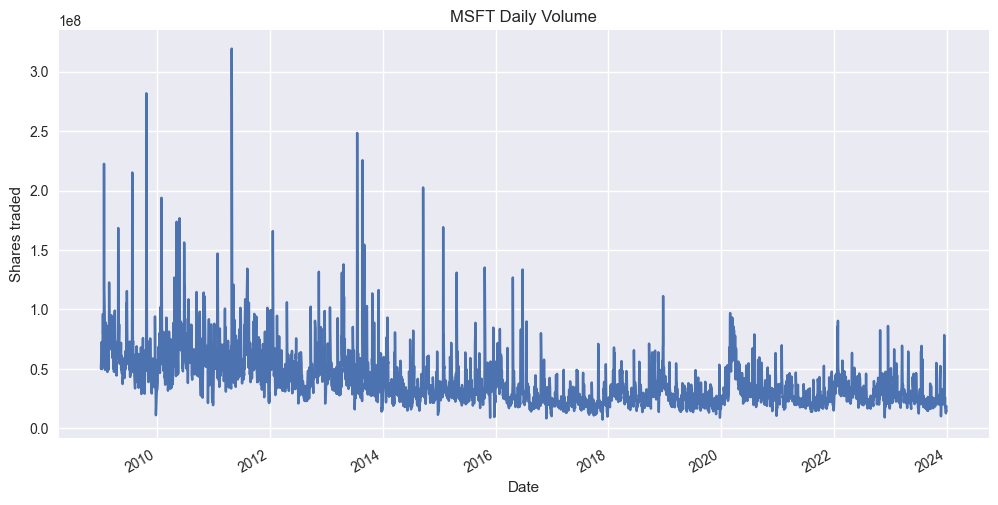

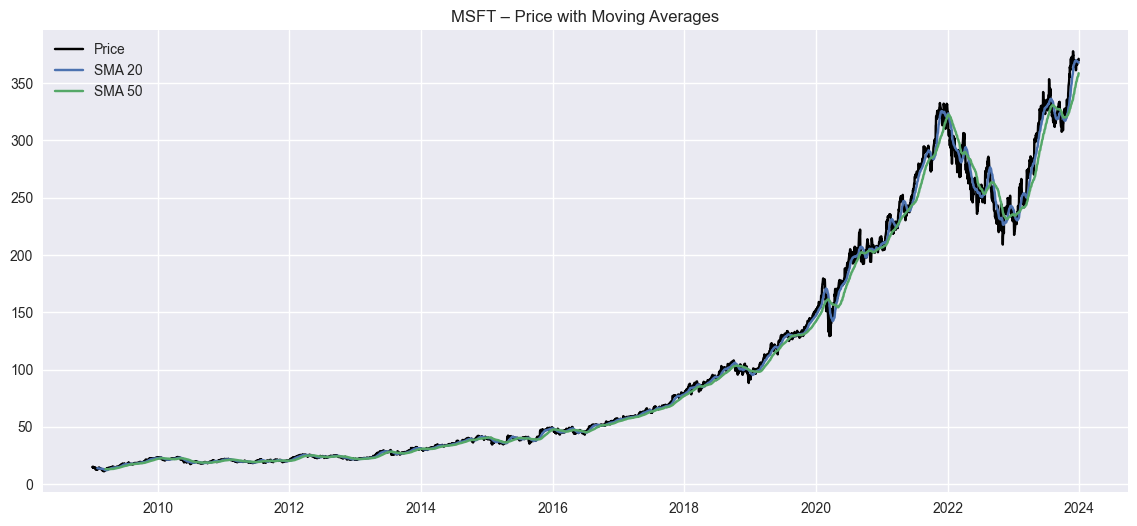

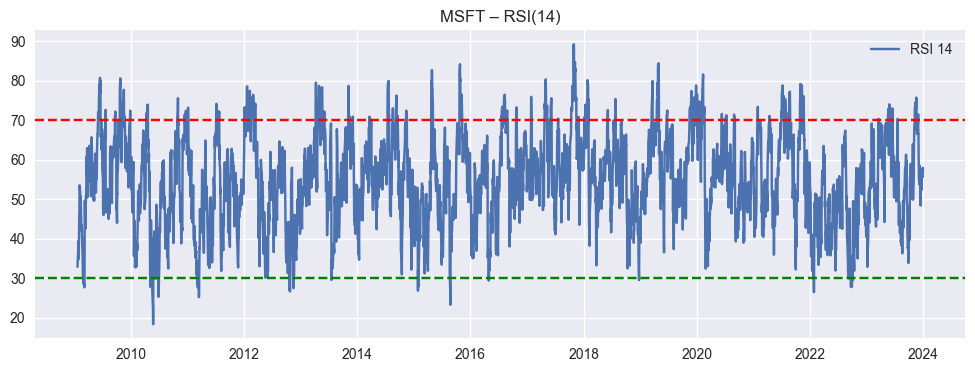

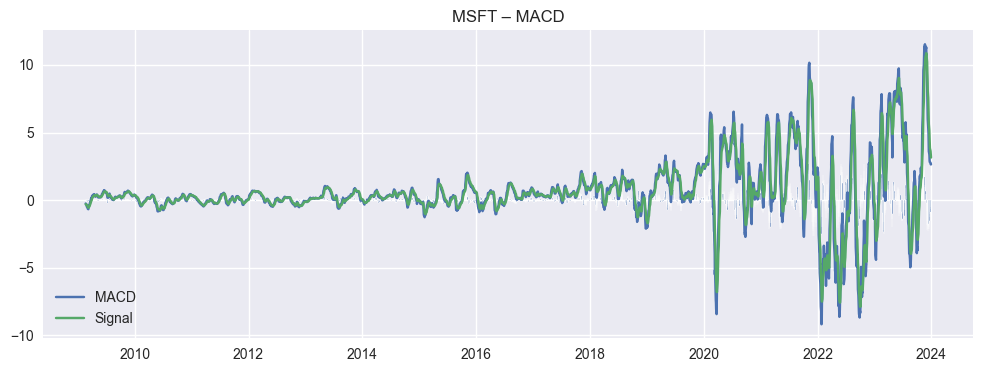


===== NVDA Summary =====
         count          mean           std           min           25%  \
Close   3774.0  6.796822e+00  1.065975e+01  1.652686e-01  3.573966e-01   
High    3774.0  6.915713e+00  1.084353e+01  1.712284e-01  3.624222e-01   
Low     3774.0  6.666721e+00  1.046139e+01  1.622887e-01  3.517434e-01   
Open    3774.0  6.793541e+00  1.065914e+01  1.652686e-01  3.570170e-01   
Volume  3774.0  5.230753e+08  3.205760e+08  4.564400e+07  3.188510e+08   

                 50%           75%           max  
Close   1.167304e+00  7.018725e+00  5.037931e+01  
High    1.176017e+00  7.091671e+00  5.051822e+01  
Low     1.157976e+00  6.849259e+00  4.938724e+01  
Open    1.166935e+00  6.939958e+00  5.018228e+01  
Volume  4.495585e+08  6.419770e+08  3.692928e+09  


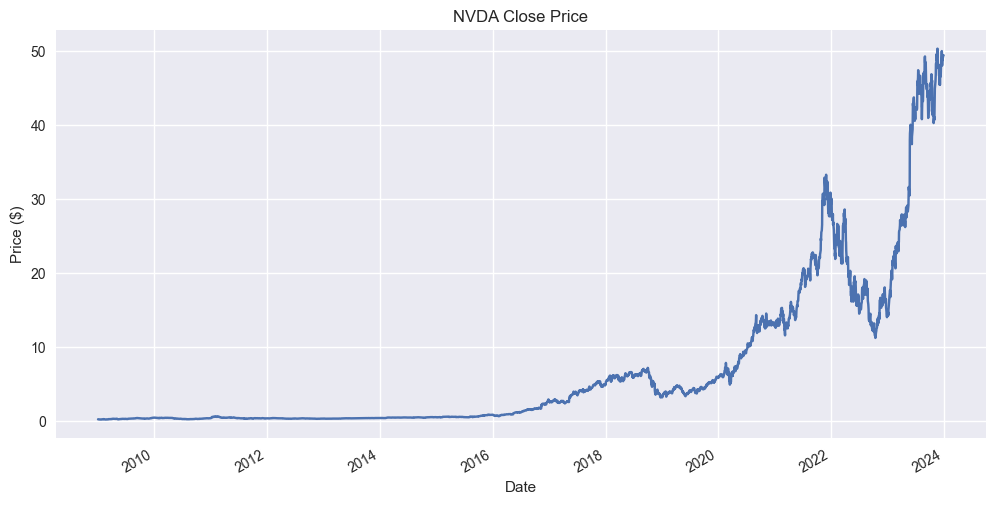

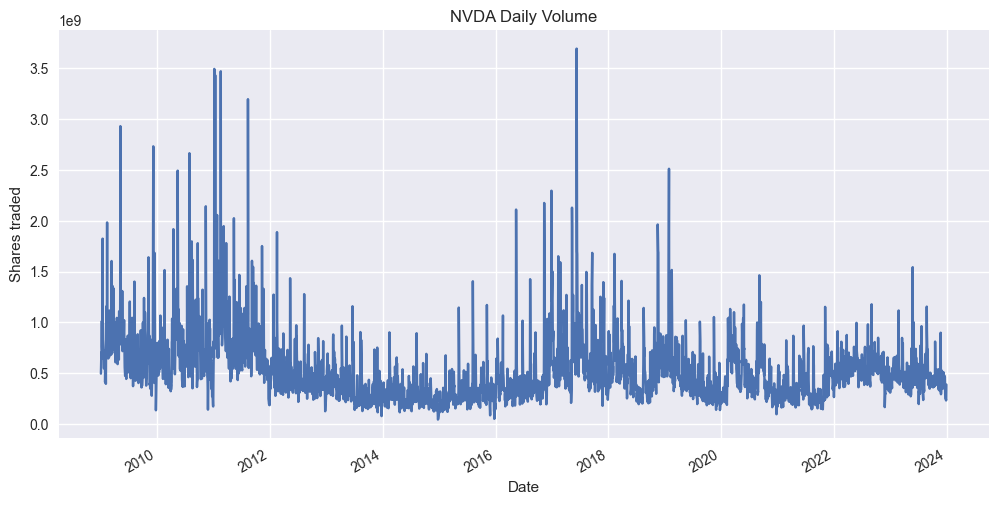

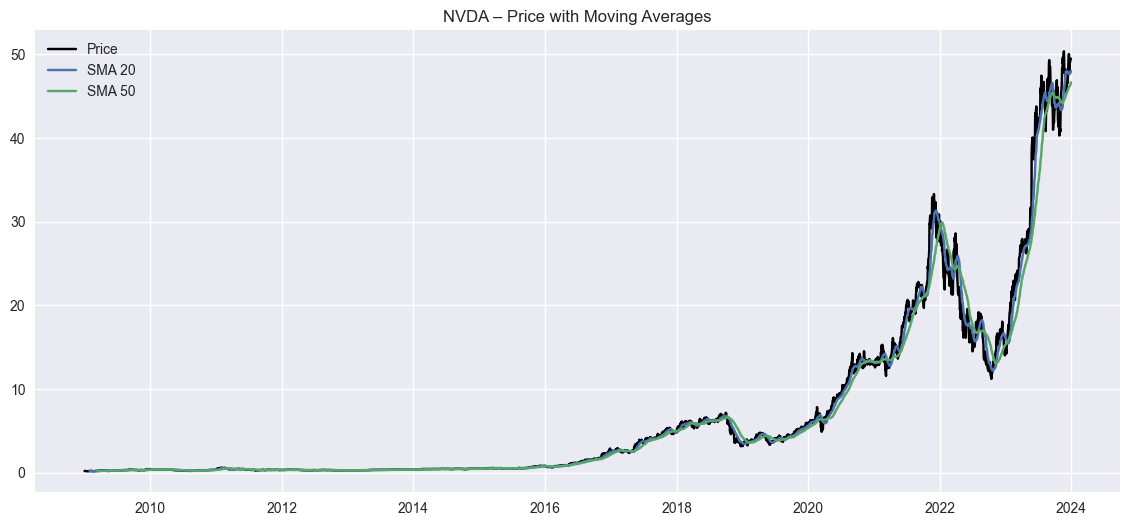

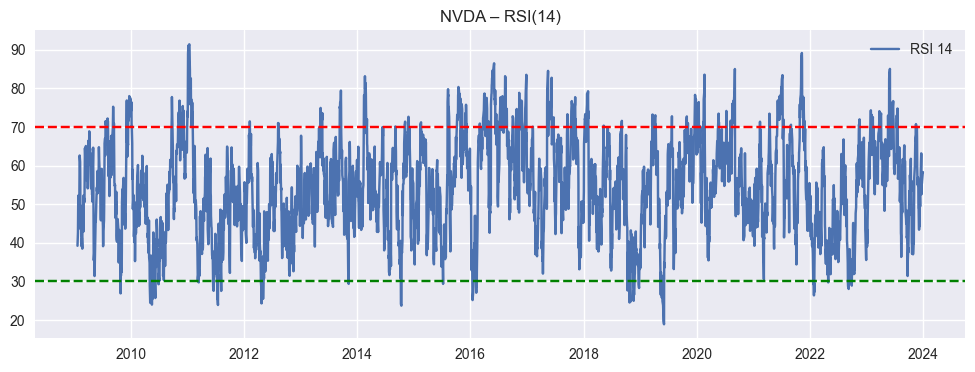

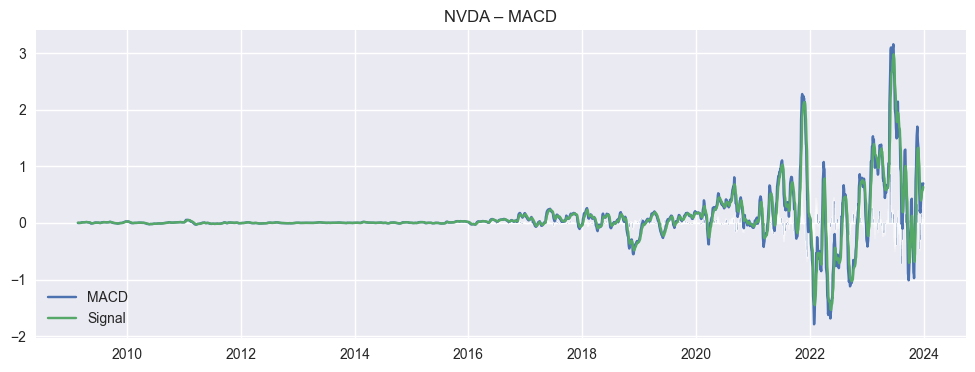

In [3]:
files = {
    "AAPL": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/AAPL.csv",
    "AMZN": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/AMZN.csv",
    "GOOG": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/GOOG.csv",
    "META": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/META.csv",
    "MSFT": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/MSFT.csv",
    "NVDA": "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/NVDA.csv",
}

results = {}

for ticker, path in files.items():
    results[ticker] = analyze_stock(path, ticker)


### Portfolio Optimisation using PyNance

In [4]:
from pynance import portfolio_optimizer as po
print("Import successful!")

Import successful!


In [5]:
tickers = ["AAPL","AMZN","GOOG","META","MSFT","NVDA"]
portfolio = po.PortfolioCalculations(tickers)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

# Max Sharpe Portfolio weights
print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

# Min Variance Portfolio (risk/return)
print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

# Min Variance Portfolio weights
print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())


=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  60.24%
Standard Deviation               34.23%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL            0.00%
AMZN            0.00%
GOOG           51.98%
META            0.00%
MSFT            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.76%
Standard Deviation            19.94%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           35.89%
AMZN            0.00%
GOOG           14.84%
META            1.18%
MSFT           48.09%
